# Big Data Project - Introduction 

## Goal

For this project, you have an extraction of data from the Airbnb website. The data are for the city of Bordeaux. 

Each observation (row) corresponds to a announce for location on the airbnb website, described by a set of variable including for instance, their title, geolocation, number of bedrooms to name a few. 

For this project you have two objectives : (1) explore these data and make a synthetic presentation (statistics, visualization); (2) propose a machine learning model capable of predict an interval of price per night to a new owner who wants to rent a property on Airbnb.

## Metrics 

You are free to choose the metric to evaluate the quality of your model. 
However, you will have to justify this choice (based on the data and on the type of model that you will choose). 


In [1]:
#Importation des librairies
import pandas as pd
import seaborn as sns 

In [176]:
# Import des données 
df = pd.read_csv("33000-BORDEAUX_nettoye.csv")
print(df.head())

   Identifiant                                 Url  \
0        28925   https://www.airbnb.fr/rooms/28925   
1        40151   https://www.airbnb.fr/rooms/40151   
2       185534  https://www.airbnb.fr/rooms/185534   
3       222887  https://www.airbnb.fr/rooms/222887   
4       286581  https://www.airbnb.fr/rooms/286581   

                                Titre  PrixNuitee   Latitude  Longitude  \
0    4 chambres dans Bordeaux  centre          25  44.849101  -0.593501   
1            Sunny flat aux Chartrons          71  44.856533  -0.574601   
2              L'Echoppe des Bouilles          75  44.830634  -0.593309   
3       Terrace with spectacular view         155  44.836383  -0.566032   
4  Appartement charme bordeaux centre          80  44.837695  -0.573713   

                                              Resume  Capacite_accueil  \
0  J'habite une grande maison que je partage tout...                 2   
1  Situé dans le quartier des Chartrons, cet appa...                 2   
2 

In [89]:
print('Number of observations: '+ str(df.shape[0]))
print('Number of variables: '+ str(df.shape[1]))

Number of observations: 5237
Number of variables: 61


In [91]:
print(df.columns)

Index(['Identifiant', 'Url', 'Titre', 'PrixNuitee', 'Latitude', 'Longitude',
       'Resume', 'Capacite_accueil', 'NombreSdB', 'NbChambres', 'NbLits',
       'Type_logement', 'type_propriete', 'type_lit', 'Animal_sur_place',
       'Cuisine', 'Internet', 'television', 'produits_base', 'Shampooing',
       'Chauffage', 'Climatisation', 'machine_laver', 'seche_linge',
       'parking_sur-place', 'wifi', 'television_cable', 'petit_dejeuner',
       'animaux_acceptes', 'pourEnfants_famille', 'adapte_evenements',
       'logement_fumeur', 'accessibilite', 'Ascenseur', 'cheminee_interieur',
       'Interphone', 'Portier', 'Piscine', 'Jacuzzi', 'salle_sport',
       'Entree_24-24', 'Cintres', 'fer_repasser', 'seche_cheveux',
       'espace_travail_ordi', 'detecteur_fumee', 'monoxyde_carbone_detect',
       'kit_secours', 'fiche_securite', 'extincteur', 'porte_chambre_verrou',
       'prix_nuitee', 'rection_semaine', 'reduction_mois',
       'surcout_voyageur_supp', 'frais_menage', 'Caution',


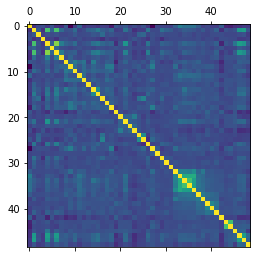

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = df.corr(method='pearson')
corr_df.drop(["Shampooing"],inplace=True)
corr_df.drop(["Shampooing"],axis=1,inplace=True)
corr_df.drop(["prix_nuitee"],inplace=True)
corr_df.drop(["prix_nuitee"],axis=1,inplace=True)
plt.matshow(corr_df)
plt.show()


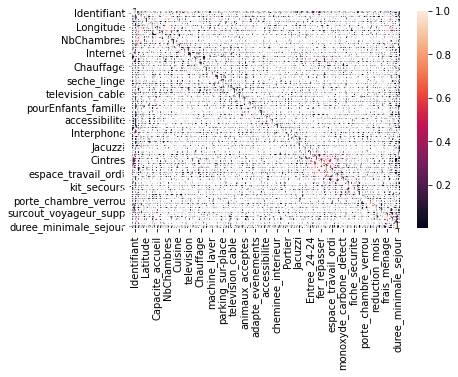

In [198]:
# Heatmap (long à l'exécution)
# sns.heatmap(corr_df, annot=True)
plt.show()

In [203]:
# Matrice de corrélation
corr_df.style.background_gradient(cmap='coolwarm')

,Identifiant,PrixNuitee,Latitude,Longitude,Capacite_accueil,NombreSdB,NbChambres,NbLits,Cuisine,Internet,television,produits_base,Chauffage,Climatisation,machine_laver,seche_linge,parking_sur-place,wifi,television_cable,petit_dejeuner,animaux_acceptes,pourEnfants_famille,adapte_evenements,logement_fumeur,accessibilite,Ascenseur,cheminee_interieur,Interphone,Portier,Piscine,Jacuzzi,salle_sport,Entree_24-24,Cintres,fer_repasser,seche_cheveux,espace_travail_ordi,detecteur_fumee,monoxyde_carbone_detect,kit_secours,fiche_securite,extincteur,porte_chambre_verrou,rection_semaine,reduction_mois,surcout_voyageur_supp,frais_menage,Caution,duree_minimale_sejour
Identifiant,1.000000,-0.096225,-0.000339,0.026652,-0.060987,0.048230,-0.090673,-0.111972,0.067968,-0.278906,-0.052768,0.139067,-0.092254,-0.044373,-0.048255,-0.086438,-0.040158,-0.051484,-0.181123,0.064540,0.018409,0.073327,-0.034359,0.025281,-0.034983,0.045029,-0.073679,-0.264338,-0.012347,-0.013525,-0.022100,-0.031363,0.100810,0.270853,0.192435,0.188792,0.193645,0.087598,-0.038006,-0.001356,-0.043032,-0.039145,0.098568,-0.145787,-0.164590,-0.108918,-0.096822,-0.059159,-0.066546
PrixNuitee,-0.096225,1.000000,0.076479,-0.098124,0.629278,0.128110,0.632813,0.170963,0.033854,0.044241,0.167095,-0.019138,0.016043,0.122149,0.142862,0.252450,0.109188,0.063334,0.145625,-0.046613,-0.026609,0.197721,0.045014,-0.101602,-0.040925,-0.040530,0.216834,0.004612,0.006400,0.197167,0.123433,0.095579,0.006653,0.039220,0.097125,0.079422,0.059521,0.012383,0.082238,-0.005626,0.029932,0.117239,-0.104613,0.047303,0.015575,0.045773,0.412444,0.444072,0.057781
Latitude,-0.000339,0.076479,1.000000,-0.034524,0.033254,0.011260,0.039392,-0.002422,-0.007335,0.018741,0.080423,0.005034,0.014579,0.023612,0.066855,0.045150,0.168291,0.018792,0.053399,0.007201,0.001395,-0.012243,0.003579,-0.029420,0.119512,0.143817,-0.010419,0.035244,0.007737,0.038233,0.006391,0.012472,0.012894,-0.010181,0.040315,0.023873,-0.019102,0.022833,-0.004703,-0.009966,0.020728,0.023282,0.022249,-0.007534,0.000315,-0.006493,0.024996,0.045813,-0.057143
Longitude,0.026652,-0.098124,-0.034524,1.000000,-0.057550,-0.026758,-0.090225,0.025062,0.033919,0.005424,-0.017205,0.030091,-0.020815,-0.007068,-0.014274,-0.043580,-0.107680,-0.006233,-0.042446,-0.044255,-0.009313,-0.028035,0.007000,0.056522,0.011291,-0.026398,-0.077653,0.029979,-0.020108,-0.114032,-0.010157,0.004301,0.008742,0.009979,0.013272,0.006736,0.000013,0.020858,-0.020728,0.008897,0.008512,-0.038792,0.023336,0.024633,0.010425,0.002203,-0.054362,-0.052049,-0.025223
Capacite_accueil,-0.060987,0.629278,0.033254,-0.057550,1.000000,0.110838,0.766409,0.263918,0.130699,0.088774,0.171912,0.010749,0.043738,0.071901,0.191419,0.235578,0.150413,0.091624,0.125772,-0.107533,0.054321,0.386869,0.059721,-0.061364,0.013476,-0.035464,0.212203,0.023037,0.002642,0.127401,0.089019,0.064730,0.023859,0.089131,0.152495,0.110988,0.102557,0.049914,0.082338,0.026442,0.045256,0.111450,-0.144331,0.064434,0.022425,0.218161,0.430599,0.383021,0.085361
NombreSdB,0.048230,0.128110,0.011260,-0.026758,0.110838,1.000000,0.137717,0.020329,0.003131,-0.018182,0.011361,0.034898,-0.002151,0.011994,-0.012031,0.024928,0.021477,0.005748,0.026876,0.049474,0.024594,0.037746,0.036690,-0.005338,-0.008751,0.004234,0.048972,-0.016845,-0.005018,0.030393,0.022267,0.018044,0.019600,0.056409,0.042347,0.051847,0.054446,0.019035,0.050238,0.016116,-0.011321,0.032691,0.048821,-0.033651,-0.021855,-0.009596,0.087179,0.043767,0.002634
NbChambres,-0.090673,0.632813,0.039392,-0.090225,0.766409,0.137717,1.000000,0.256852,0.066577,0.092385,0.111035,-0.012423,0.037829,0.081733,0.238186,0.273488,0.166777,0.115290,0.112765,-0.049628,0.001609,0.282545,0.034336,-0.054898,-0.008412,-0.061664,0.270514,-0.025416,0.008678,0.163838,0.088064,0.068009,0.000035,0.023154,0.127069,0.091673,0.056945,0.034308,0.063427,0.028923,0.028751,0.117981,-0.065958,0.015024,-0.040681,0.097844,0.417004,0.346687,0.085896
NbLits,-0.111972,0.170963,-0.002422,0.025062,0.263918,0.020329,0

In [200]:
i = 0
new_corr = []
new_corr_index = []
while i < corr_df['PrixNuitee'].count():
    if(corr_df['PrixNuitee'][i] < 0.4):
        corr_df['PrixNuitee'][i]
    else:
        new_corr_index.append(corr_df['PrixNuitee'].index[i])
    i = i + 1
print(new_corr_index)

['PrixNuitee', 'Capacite_accueil', 'NbChambres', 'frais_menage', 'Caution']


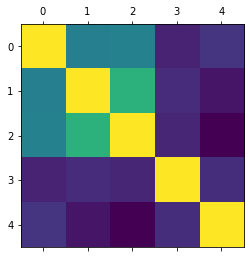

In [201]:
#Reducing the data
df2 = df[new_corr_index].corr()
plt.matshow(df2)
plt.show()

In [192]:
# Matrice de corrélation
df2.style.background_gradient(cmap='coolwarm')

,PrixNuitee,Capacite_accueil,NbChambres,frais_menage,Caution
PrixNuitee,1.000000,0.629278,0.632813,0.412444,0.444072
Capacite_accueil,0.629278,1.000000,0.766409,0.430599,0.383021
NbChambres,0.632813,0.766409,1.000000,0.417004,0.346687
frais_menage,0.412444,0.430599,0.417004,1.000000,0.430968
Caution,0.444072,0.383021,0.346687,0.430968,1.000000


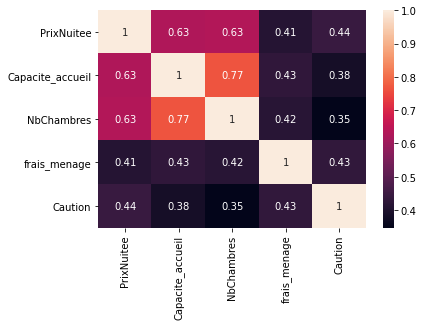

<Figure size 432x288 with 0 Axes>

In [196]:
# Heatmap
sns.heatmap(df2, annot=True)
plt.show()
plt.savefig("heatmapRBNB.png")

## Example of statistical analysis

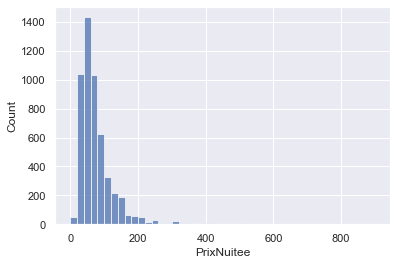

In [206]:
# Setting seaborn as default style even if use only matplotlib
sns.set() 
hist = sns.histplot(data=df, x="PrixNuitee", binwidth=20)

In [6]:
df["PrixNuitee"].describe()

count    5237.000000
mean       76.243078
std        62.878115
min         0.000000
25%        40.000000
50%        60.000000
75%        90.000000
max       900.000000
Name: PrixNuitee, dtype: float64

## Dealing with textual variable 

The `nltk` library is the reference to preprocess text. 
Why do you need preprocessing ? Here is an example !

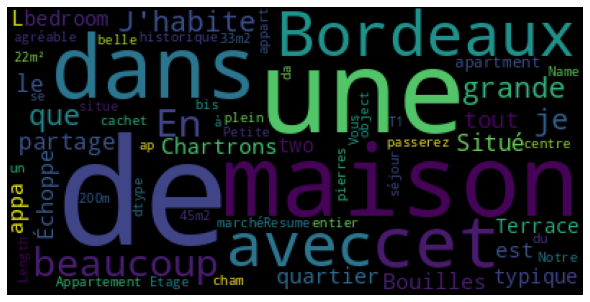

In [33]:
# Visualisation of the variable 'Resume' with wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(str(df['Resume']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [30]:
# Lets preprocess the text
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    # Lowercase text
    sentence = sentence.lower()
    # Remove whitespace
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    # Remove weblinks
    rem_url=re.sub(r'http\S+', '',cleantext)
    # Remove numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    # Remove StopWords
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('french')]
    # Use lemmatization
    # lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


df['Resume_pre']=df['Resume'].map(lambda s:preprocess(s)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laclau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/laclau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/laclau/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


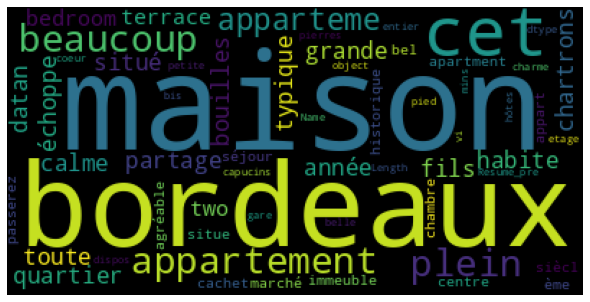

In [32]:
wordcloud = WordCloud().generate(str(df['Resume_pre']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### Questions to address for textual data

- How to deal with two langages? (here french and english are mixed)
- How to convert them to textual variable to numerical vector ? 
    - TF-IDF is the most common way 
    - Word embedding is the most popular way
- How to visualise them (eg. wordcloud) but whatelse ?

## Visualisation : some more pointers 

Python offers a large choice of libraries for visualisation purpose. 
To start, I suggest you to follow the two tutorials available on my [github](https://github.com/laclauc/dataviz-JDS). First part is present the classical static libraries for data visualisation while the second part present `plotly` for dynamic data visualisation. Finally, the end of this second part presents Dash to create dynamic dashboard, see the [gallery](https://dash.gallery/Portal/) for examples.